# Predicting Movie Lifetime Gross Revenue




## Introduction, Motivation, and Data Overview

**Introduction**

The modern movie industry is worth billions of dollars, with new movies coming out in multiple languages every week. Individuals enjoy movies through traditional theaters, streaming services such as Netflix, and occasionally through physical formats such as DVDs. Movies are more than a mere form of entertainment: they represent the a cultural artifact reflecting the moods, attitudes, fears, and hopes of a society. Movies have the power to shape the public opinion, act as a form of protest, and even call out key cultural, political, and economic issues.

As such, the best movies can remain a part of a society for many years after the directors, actors, and even the original audience has moved on. The most popular movies have turned previously unknown actors and directors into household names and enshrined characters and plot references into daily speech. Successful movie stakeholders capitalize on their success by issuing reruns, merchendise, sequals, and in rare instances, building entire cinematic universes. These can become incredibly profitable for everyone involved.

**Motivation**

Movies, especially modern ones, are incredibly expensive. They require enormous investments in time, money, effort, and talent. However, the rewards can be equally impressive.

Moviemakers want to ensure the maximum revenue possible. **As such, I seek to build a model that can predict the lifetime gross revenue of a movie.** This model, if implemented, has many real world implications: directors and studios can use it to predict the lifetime gross profits of a movie in the days and weeks immediately after a release, enabling them to make early decisions on whether it is financially possible or worthwhile to create a sequal or release it on other platforms besides movie theaters. Investors can use these models to predict whether to invest in a movie or any projected sequals that get pitched to them. Finally, individual analysts and film enthusiasts can use these models to track their favorite franchises, to see if any announced future projects are likely to succeed or fail.

**Data Overview**

The [data](https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?resource=download) contains information about the top 1000 movies by IMDB rating. The data was collected by Kaggle user Harshit Shankhdhar, who web scraped the information off of the IMDB website into a CSV file.

There are a total of 16 columns in the raw dataset. From left to right, they are the following:
1. Advertising poster link
2. Title
3. Release year
4. Certificate (rating of movie appropriateness) - G, PG, PG-13, etc.
5. Runtime (minutes)
6. Genre
7. IMDB rating
8. Movie overview/summary
9. Metascore (rating given by professional critics)
10. Director
11. Star Actor
12. Star Actor
13. Star Actor
14. Star Actor
15. Total Votes (on IMDB)
16. Gross Lifetime Revenue


The results of the data may be volatile due to certain metrics, such as ratings, being dependent on consumer tastes and sentiments which change over time. Additionally, as the Gross column represents Lifetime Gross Revenue, this is a nominal value and does not take inflation into account. However, without more granular source data (which IMDB does not provide for free), it is impossible to create a perfectly inflation-adjusted dataset as the most successful movies continuously generate revenue for decades after the initial release. Therefore, this nominal revenue data is the best that is publicly available.

The data will certainly require cleaning, as some rows lack key information such as Gross Revenue. Additionally, the movie certificates use several different rating scales from different regulatory bodies. We perform exploratory data analysis and cleaning in the section below.

## Data Cleaning

#### Raw Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

In [2]:
#load dataset
raw_data = 'https://raw.githubusercontent.com/GordonRamsLi/DataBootcampFinalProject/refs/heads/main/imdb_top_1000.csv'
movie = pd.read_csv(raw_data)
movie.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB


#### Light Cleaning - Making sure categorical variables do not have whitespace before or after

In [4]:
movie["Series_Title"] = movie["Series_Title"].str.strip()

movie["Certificate"] = movie["Certificate"].str.strip()

movie["Genre"] = movie["Genre"].str.strip()

movie["Overview"] = movie["Overview"].str.strip()

movie["Director"] = movie["Director"].str.strip()

movie["Genre"] = movie["Genre"].str.strip()

movie["Director"] = movie["Director"].str.strip()

movie["Star1"] = movie["Star1"].str.strip()
movie["Star2"] = movie["Star2"].str.strip()
movie["Star3"] = movie["Star3"].str.strip()
movie["Star4"] = movie["Star4"].str.strip()

####Addressing missing data and adjusting data types

We see above that there is quite a lot of missing data in the Certificate, Meta_score, and Gross columns. Additionally, Released_Year should be converted to an integer, and Runtime and Gross should be integers.

In [5]:
# fill in some missing data manually
movie.loc[movie["Released_Year"] == "PG", "Released_Year"] = "1995"

In [6]:
# remove all rows with empty data
movie.dropna(inplace = True)

In [7]:
# Convert Released_Year to datetime with only year, Runtime to integer, and Gross to integer
movie['Released_Year'] = pd.to_datetime(movie['Released_Year']).dt.year
movie['Runtime'] = movie['Runtime'].astype(str).replace(' min', '', regex = True).astype(int)
movie['Gross'] = movie['Gross'].astype(str).replace(",", "", regex = True).astype(int)

In [8]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 997
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    714 non-null    object 
 1   Series_Title   714 non-null    object 
 2   Released_Year  714 non-null    int32  
 3   Certificate    714 non-null    object 
 4   Runtime        714 non-null    int64  
 5   Genre          714 non-null    object 
 6   IMDB_Rating    714 non-null    float64
 7   Overview       714 non-null    object 
 8   Meta_score     714 non-null    float64
 9   Director       714 non-null    object 
 10  Star1          714 non-null    object 
 11  Star2          714 non-null    object 
 12  Star3          714 non-null    object 
 13  Star4          714 non-null    object 
 14  No_of_Votes    714 non-null    int64  
 15  Gross          714 non-null    int64  
dtypes: float64(2), int32(1), int64(3), object(10)
memory usage: 92.0+ KB


####Standardizing Certificate ratings

We encounter our next issue: the Certificate ratings column uses multiple sets of rating scales. Using the [IMBD reference](https://help.imdb.com/article/contribution/titles/certificates/GU757M8ZJ9ZPXB39?ref_=helpart_nav_27#countries) and this [government article](https://www.cbfcindia.gov.in/cbfcAdmin/certification.php#:~:text=Initially%2C%20there%20were%20only%20two,and%20%E2%80%9CS%E2%80%9D%20(restricted%20to) and [blog](https://www.thehealthsite.com/photo-gallery/parenting-u-ua-a-pg-and-other-film-certifications-and-what-they-mean-z1216-451530/shutterstock_297732923-1-451562/) on Indian rating scales, I will convert ratings into the American system (G, PG, PG-13, R) with the following scale:

U = G

GP and TV-PG = PG

UA and U/A = PG-13

A = R



I will remove movies rated "Passed" and "Approved", as they fall under the old requirements of Hayes's Law. This binary system is much too broad, and since they only make up 15 movies, I will simply drop them.

Note that these conversions are quite subjective.

In [9]:
movie["Certificate"].value_counts()

,count
Certificate,
U,183
A,174
UA,142
R,131
PG-13,38
PG,19
G,9
Passed,9
Approved,6


In [10]:
#Convert the ratings
movie.loc[movie["Certificate"] == "U", "Certificate"] = "G"

movie.loc[movie["Certificate"] == "GP", "Certificate"] = "PG"
movie.loc[movie["Certificate"] == "TV-PG", "Certificate"] = "PG"

movie.loc[movie["Certificate"] == "UA", "Certificate"] = "PG-13"
movie.loc[movie["Certificate"] == "U/A", "Certificate"] = "PG-13"


movie.loc[movie["Certificate"] == "A", "Certificate"] = "R"


In [11]:
# drop Passed and Approved certificates
movie.drop(movie[movie["Certificate"] == "Passed"].index, inplace = True)
movie.drop(movie[movie["Certificate"] == "Approved"].index, inplace = True)

In [12]:
movie.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,G,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


In [13]:
movie["Certificate"].value_counts()

,count
Certificate,
R,305
G,192
PG-13,181
PG,21


#### Combining the actor columns

It may be useful to have all actors in one column, so we do that here

In [14]:
#combine the Star columns into new column "Stars"
movie["Stars"] = movie["Star1"] + ", " + movie["Star2"] + ", " + movie["Star3"] + ", " + movie["Star4"]

#Move new column "Stars" after Director column
temp = movie.pop("Stars")
movie.insert(10, "Stars", temp)

#Drop old Star columns
#movie.drop(["Star1", "Star2", "Star3", "Star4"], axis = 1, inplace = True)

movie.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Stars,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,R,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,G,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


#### Splitting the Genres

It may be helpful to have the genres in separate columns, so we do that here.

In [15]:
# split genres by column
genres_split = movie['Genre'].str.split(',', expand=True)
genres_split = genres_split.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
genres_split.columns = ['Genre 1', 'Genre 2', 'Genre 3']

count = 6
for column in genres_split.columns:
  movie.insert(count, column, genres_split[column])
  count += 1

movie.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Genre 1,Genre 2,Genre 3,IMDB_Rating,Overview,Meta_score,Director,Stars,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142,Drama,Drama,None,None,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175,"Crime, Drama",Crime,Drama,None,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",Action,Crime,Drama,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,R,202,"Crime, Drama",Crime,Drama,None,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,"Al Pacino, Robert De Niro, Robert Duvall, Dian...",Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,G,96,"Crime, Drama",Crime,Drama,None,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,"Henry Fonda, Lee J. Cobb, Martin Balsam, John ...",Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000


## Data Investigation and Exploratory Data Analysis

#### Preliminary Investigations

In [16]:
#final dataset after cleaning
movie.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 0 to 994
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    699 non-null    object 
 1   Series_Title   699 non-null    object 
 2   Released_Year  699 non-null    int32  
 3   Certificate    699 non-null    object 
 4   Runtime        699 non-null    int64  
 5   Genre          699 non-null    object 
 6   Genre 1        699 non-null    object 
 7   Genre 2        624 non-null    object 
 8   Genre 3        468 non-null    object 
 9   IMDB_Rating    699 non-null    float64
 10  Overview       699 non-null    object 
 11  Meta_score     699 non-null    float64
 12  Director       699 non-null    object 
 13  Stars          699 non-null    object 
 14  Star1          699 non-null    object 
 15  Star2          699 non-null    object 
 16  Star3          699 non-null    object 
 17  Star4          699 non-null    object 
 18  No_of_Votes    

In [17]:
movie.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,Genre 1,Genre 2,Genre 3,IMDB_Rating,Overview,Meta_score,Director,Stars,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,R,142,Drama,Drama,None,None,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,"Tim Robbins, Morgan Freeman, Bob Gunton, Willi...",Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,R,175,"Crime, Drama",Crime,Drama,None,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,"Marlon Brando, Al Pacino, James Caan, Diane Ke...",Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


###### Preliminary Investigations - Quantitative Variables

In [18]:
# Decribe the data
movie.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,699.000000,699.000000,699.000000,699.000000,6.990000e+02,6.990000e+02
mean,1996.776824,123.695279,7.935050,76.937053,3.618417e+05,8.002793e+07
std,17.305745,26.036730,0.294922,12.364986,3.554662e+05,1.157291e+08
min,1930.000000,72.000000,7.600000,28.000000,2.522900e+04,1.305000e+03
25%,1987.500000,104.000000,7.700000,69.000000,9.850300e+04,6.727491e+06
50%,2001.000000,120.000000,7.900000,78.000000,2.415750e+05,3.590000e+07
75%,2010.000000,136.500000,8.100000,86.000000,5.159115e+05,1.066073e+08
max,2019.000000,238.000000,9.300000,100.000000,2.343110e+06,9.366622e+08


The cleaned dataset now has 699 movies. The movie release years range from 1930 to 2019. Runtimes range from just 72 minutes to 238 minutes, with the average being around 2 hours. IMDB ratings range from 7.6 to 9.3, with the average being a 7.9. The Metacritic scores range from from 28 to a perfect 100, with the average around a 77. The number of votes for a movie range from just over 25,000 to 2.3 million votes, with the average number of votes at 362,000.

###### Preliminary Investigations - Categorical Variables

In [19]:
movie["Certificate"].value_counts()

,count
Certificate,
R,305
G,192
PG-13,181
PG,21


In [20]:
movie[['Genre 1', 'Genre 2', "Genre 3"]].apply(pd.Series.value_counts).sum(axis = 1).sort_values(ascending = False)

,0
Drama,489.0
Adventure,160.0
Comedy,159.0
Crime,141.0
Action,138.0
Thriller,97.0
Biography,88.0
Romance,84.0
Mystery,68.0
Animation,63.0


In [21]:
movie["Director"].value_counts()

,count
Director,
Steven Spielberg,13
Martin Scorsese,10
Clint Eastwood,8
Christopher Nolan,8
Quentin Tarantino,8
...,...
Alan J. Pakula,1
Alejandro Jodorowsky,1
Luis Buñuel,1


In [22]:
movie[['Star1', 'Star2', "Star3", "Star4"]].apply(pd.Series.value_counts).sum(axis = 1).sort_values(ascending = False)

,0
Robert De Niro,16.0
Tom Hanks,14.0
Al Pacino,13.0
Brad Pitt,12.0
Clint Eastwood,11.0
...,...
Jacki Weaver,1.0
Jack Thibeau,1.0
Jack Reynor,1.0
Jack McBrayer,1.0


The categorical variables include the movie Certificate, Genre(s), Director, and movie stars. The four certificates, G, PG, PG-13, and R, have counts of 192, 21, 181, and 305, respectively. The most common certificate is R, and the least common is PG. There are 21 different possible genres, with by far the most common being Drama, with 489 movies in this category. Adventure and Comedy are a distant second and third place. Movies can belong to multiple genres. Of the 699 movies, 438 belong to 3 genres, 186 belong to 2 genres, and 75 belong to just 1 genre. The movies represent 395 directors, with Stephen Spielberg directing the most movies, at 13. There are 1870 movie stars named in the data, with Robert De Niro being named the most at 16 times, then Tom Hanks at 14, and Al Pacino at 13.

#### Exploratory Data Analysis

######Descriptive Statistics

In [23]:
#Average lifetime gross revenue
movie["Gross"].mean()

80027927.89699571

In [24]:
# Median lifetime gross revenue
movie["Gross"].median()

35900000.0

In [25]:
# Standard deviation of lifetime gross revenue
movie["Gross"].std()

115729056.70607129

In [26]:
# Minimum lifetime gross revenue
movie["Gross"].min()

1305

In [27]:
# Maximum lifetime gross revenue
movie["Gross"].max()

936662225

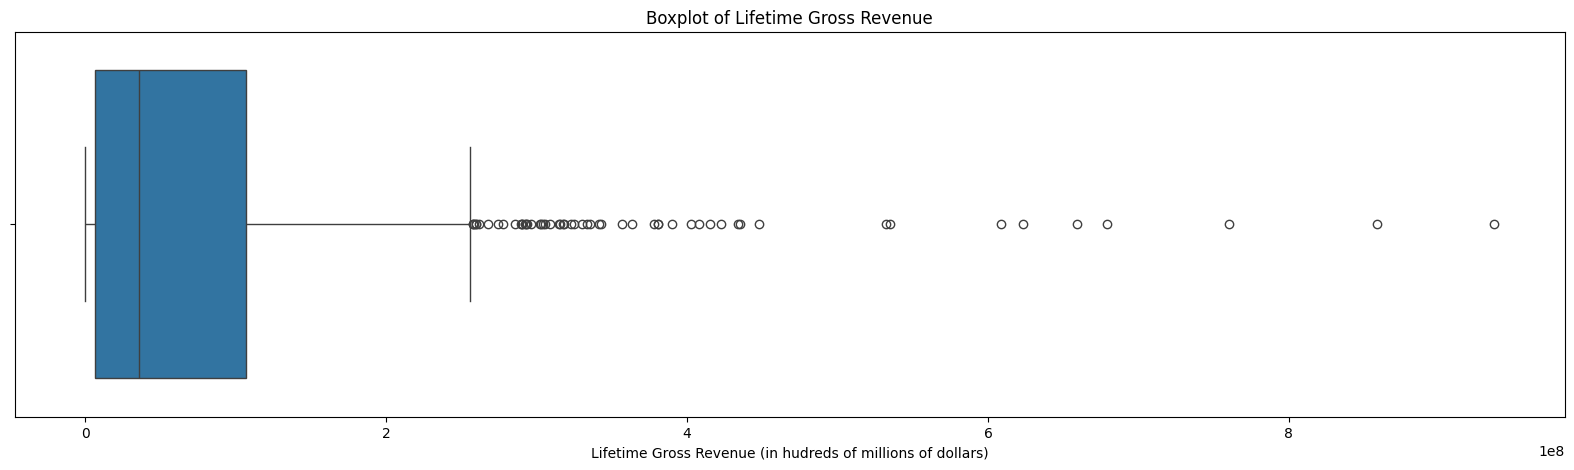

In [28]:
# boxplot of Gross
fig, ax = plt.subplots(figsize = (20, 5))
sns.boxplot(x = movie["Gross"])
plt.title("Boxplot of Lifetime Gross Revenue")
plt.xlabel("Lifetime Gross Revenue (in hudreds of millions of dollars)")
plt.show()


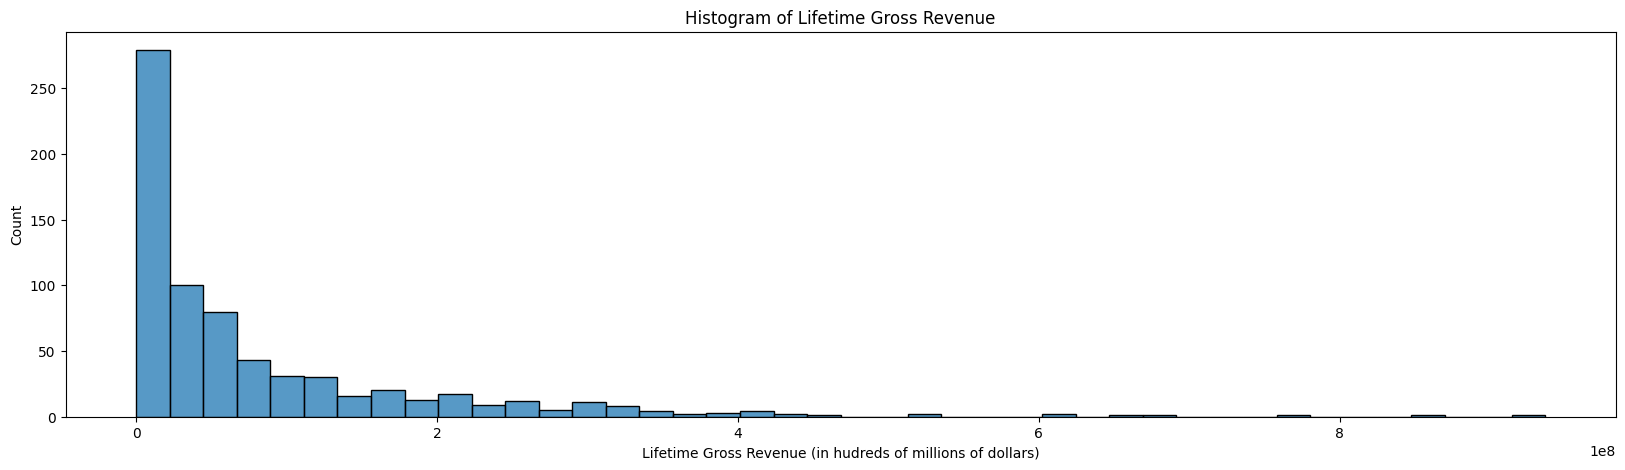

In [29]:
# Histogram of Gross
fig, ax = plt.subplots(figsize = (20, 5))
sns.histplot(data = movie, x = "Gross")
plt.title("Histogram of Lifetime Gross Revenue")
plt.xlabel("Lifetime Gross Revenue (in hudreds of millions of dollars)")
plt.show()

From the visualizations above, we see that Lifetime Gross Revenue has an average of around 80 million dollars, a median of around 35 million dollars, a standard deviation of over 115 million dollars, and ranges from just 1305 dollars to 936,662,225 dollars.

The data is heavily skewed, with many high outliers. This could partly result from the fact that relatively few movies make large amounts of money while most movies make very little money. This could also be the result of using Nominal Revenue data instead of using Real Revenue (i.e. adjusted for inflation).

######Initial Visualizations

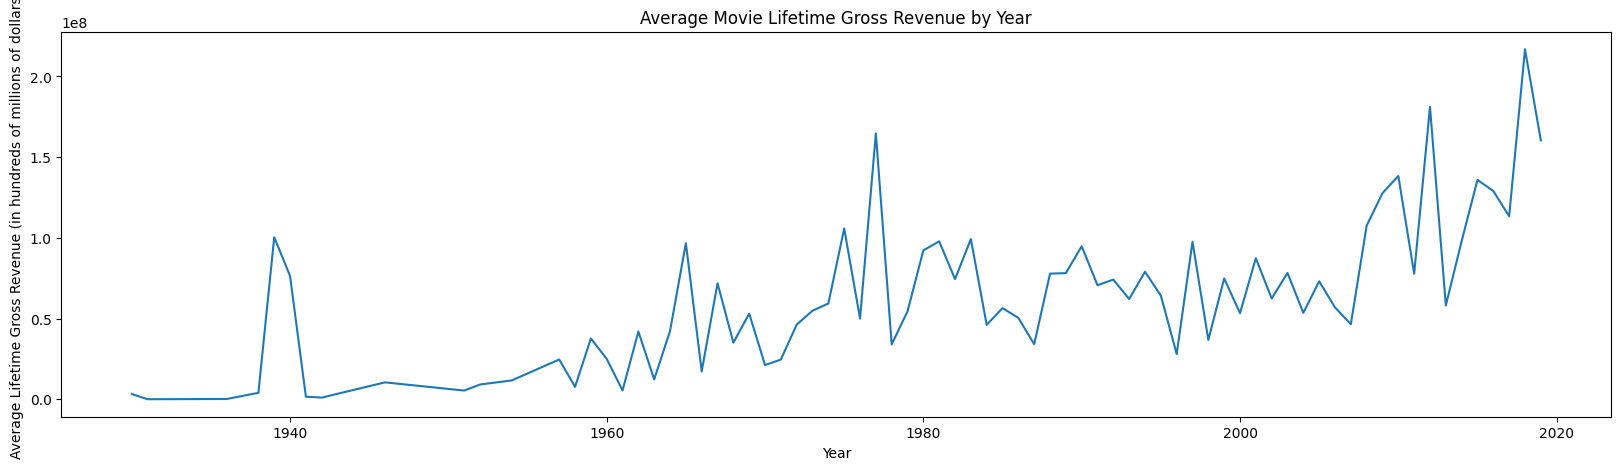

In [30]:
# lineplot of average gross by year
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(x = movie.groupby(movie["Released_Year"])["Gross"].mean().index, y = movie.groupby(movie["Released_Year"])["Gross"].mean())
plt.title("Average Movie Lifetime Gross Revenue by Year")
plt.xlabel("Year")
plt.ylabel("Average Lifetime Gross Revenue (in hundreds of millions of dollars)")
plt.show()

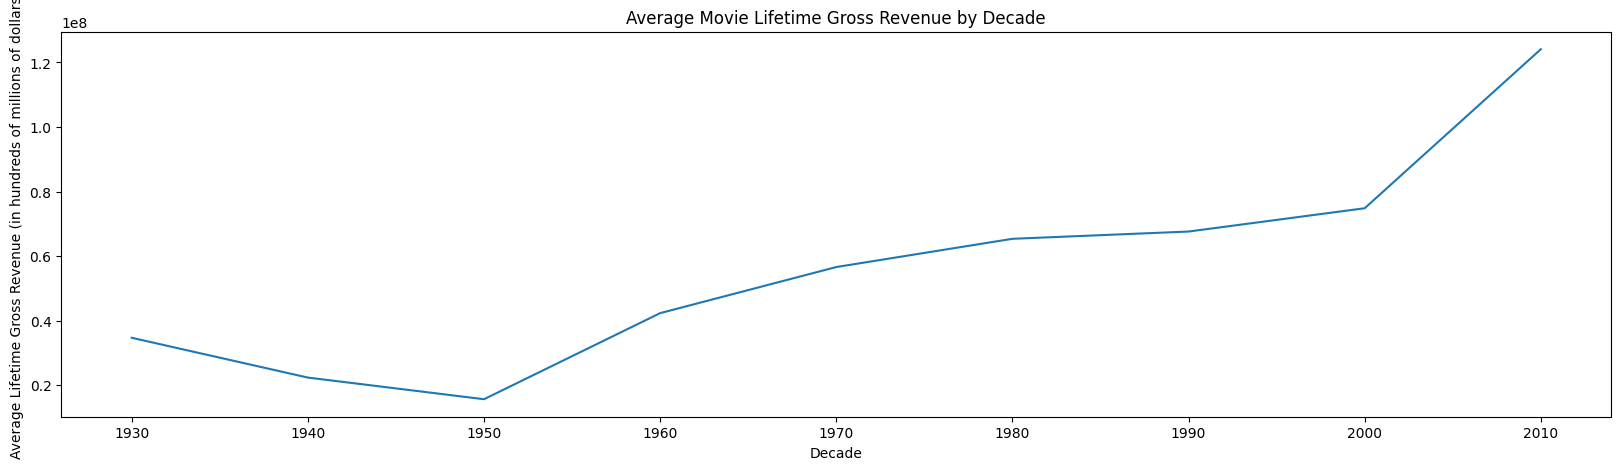

In [31]:
# lineplot of average gross by decade
fig, ax = plt.subplots(figsize = (20, 5))
sns.lineplot(x = movie.groupby(movie["Released_Year"] // 10 * 10)["Gross"].mean().index, y = movie.groupby(movie["Released_Year"] // 10 * 10)["Gross"].mean())
plt.title("Average Movie Lifetime Gross Revenue by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Lifetime Gross Revenue (in hundreds of millions of dollars)")
plt.show()

The two line graphs above shows that the average Lifetime Gross Revenue generally increases by decade. The first plot shows that the yearly average is highly volatile, especially after 1960. However, the general trend in both line graphs suggests that on average, lifetime gross revenue trends upward over time.

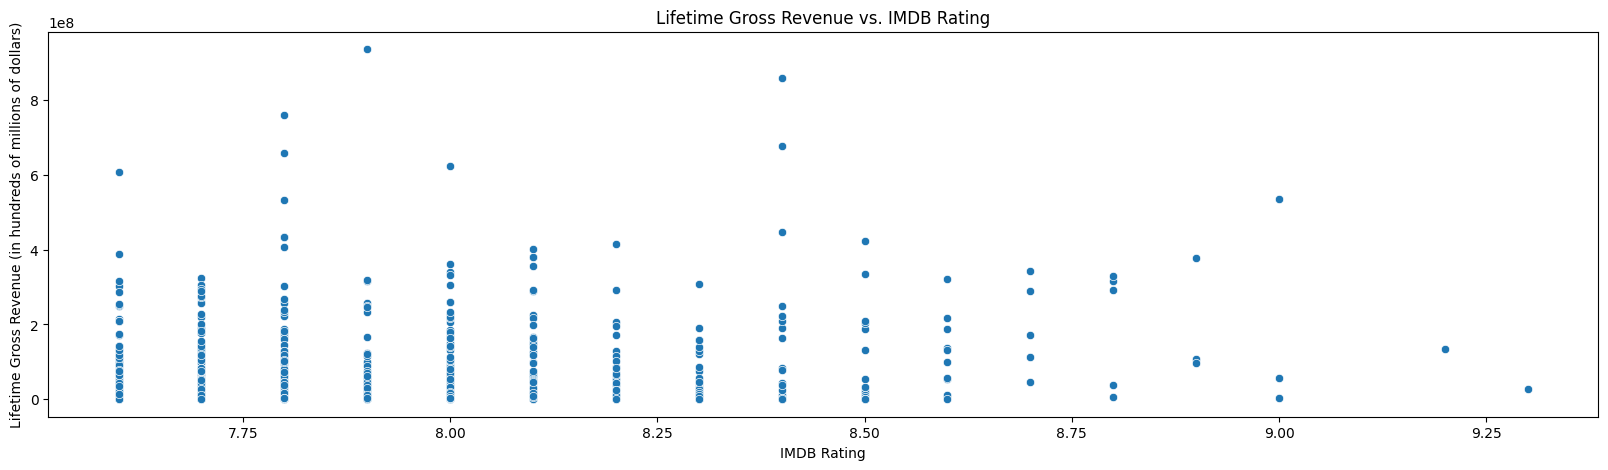

In [32]:
#Scatterplot between IMDB rating and Gross
fig, ax = plt.subplots(figsize = (20, 5))
sns.scatterplot(x = movie["IMDB_Rating"], y = movie["Gross"])
plt.title("Lifetime Gross Revenue vs. IMDB Rating")
plt.xlabel("IMDB Rating")
plt.ylabel("Lifetime Gross Revenue (in hundreds of millions of dollars)")
plt.show()

The scatterplot above does not show a strong correlation between a movie's IMDB rating and Lifetime Gross Revenue. We can clearly see, however, that most movies do not bring in more than 400 million dollars in Lifetime Gross Revenue

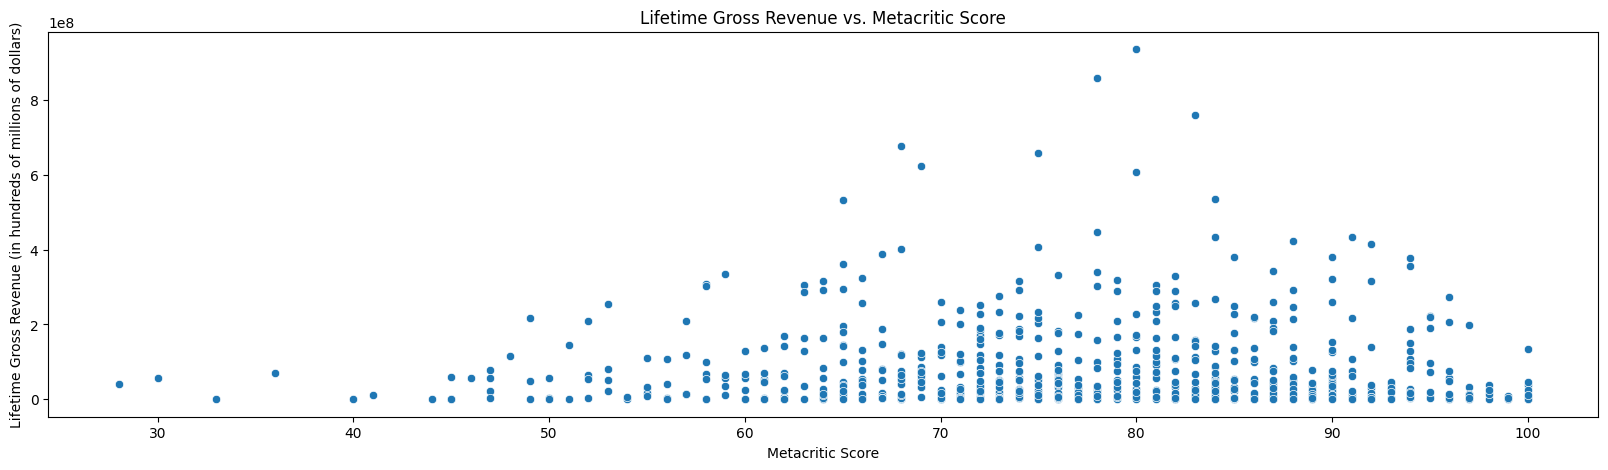

In [33]:
#Scatterplot btwn Metacritic score and Lifetime Gross Revenue
fig, ax = plt.subplots(figsize = (20, 5))
sns.scatterplot(x = movie["Meta_score"], y = movie["Gross"])
plt.title("Lifetime Gross Revenue vs. Metacritic Score")
plt.xlabel("Metacritic Score")
plt.ylabel("Lifetime Gross Revenue (in hundreds of millions of dollars)")
plt.show()

The scatterplot above shows that there may be a weak, positive relationship between between Metacritic scores and a movie's Lifetime Gross Revenue. Movies with higher critic scores appear to have a higher lifetime gross revenue.

Additionally, we can observe that the majority of Metacritic scores are higher than 60, and that the highest grossing movie had a Metacritic score of 80.

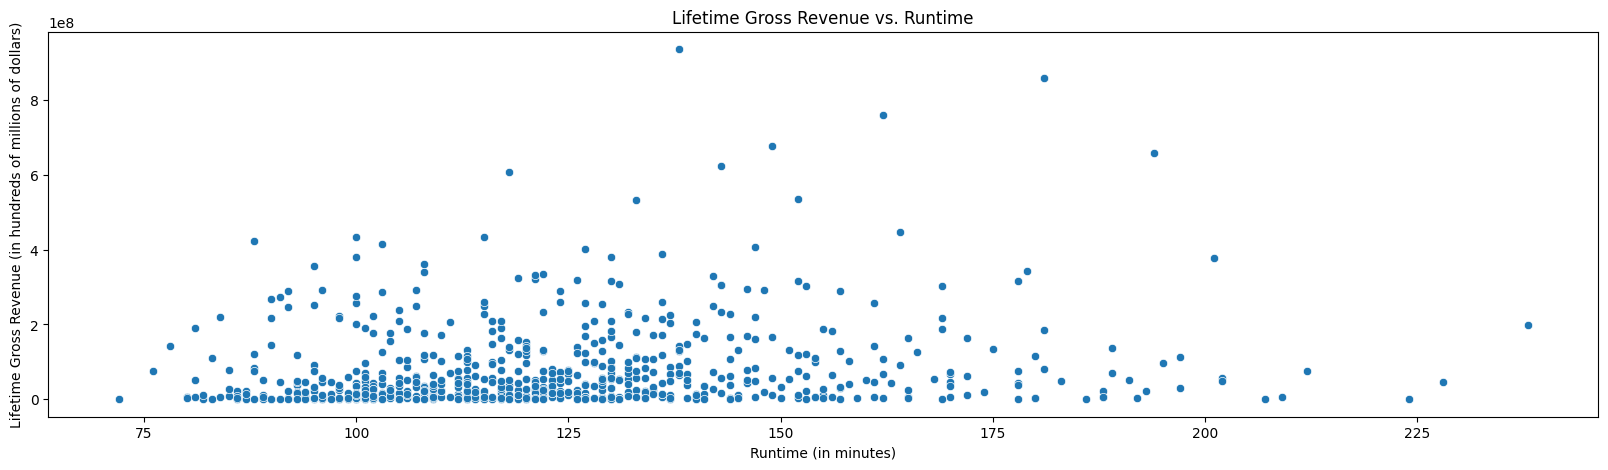

In [34]:
#Correlation of Runtime and Gross
fig, ax = plt.subplots(figsize = (20, 5))
sns.scatterplot(x = movie["Runtime"], y = movie["Gross"])
plt.title("Lifetime Gross Revenue vs. Runtime")
plt.xlabel("Runtime (in minutes)")
plt.ylabel("Lifetime Gross Revenue (in hundreds of millions of dollars)")
plt.show()

There appears to be a weak, positive correlation between runtime and Lifetime Gross Revenue. It appears as though a longer runtime weakly predicts a higher lifetime gross revenue.

We note that the majority of movies have a runtime less than 150 minutes, and that the highest grossing movie had a runtime of around 135 minutes.

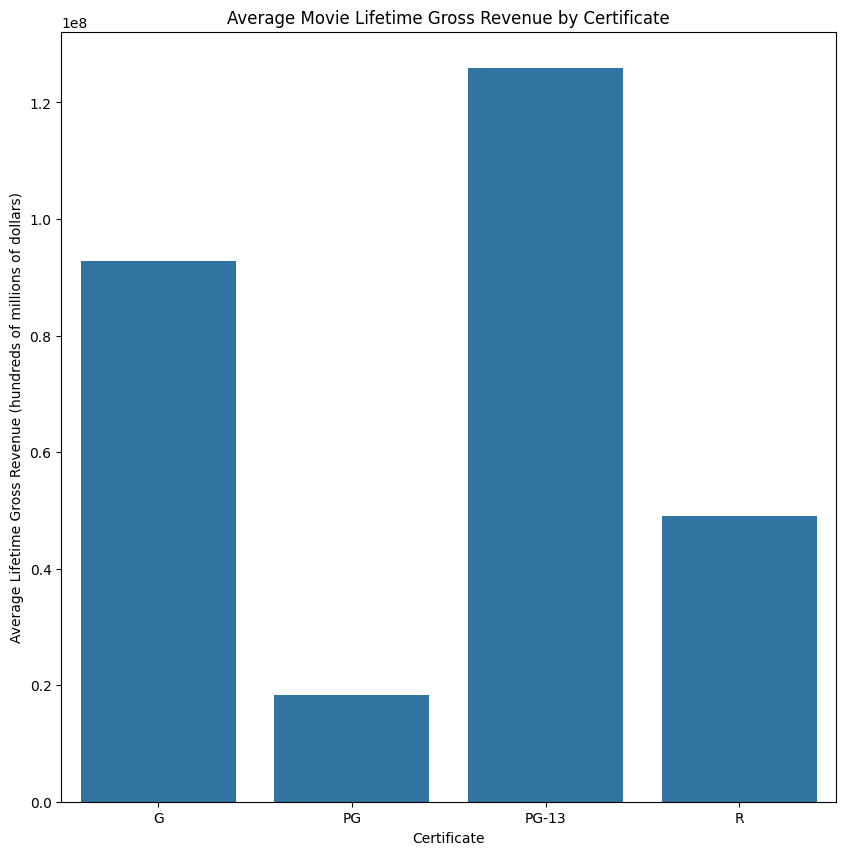

In [35]:
#Bar graph of average Gross split by Certificate
fig, ax = plt.subplots(figsize = (10, 10))
sns.barplot(x = movie.groupby("Certificate")["Gross"].mean().index, y = movie.groupby("Certificate")["Gross"].mean())
plt.title("Average Movie Lifetime Gross Revenue by Certificate")
plt.xlabel("Certificate")
plt.ylabel("Average Lifetime Gross Revenue (hundreds of millions of dollars)")
plt.show()

We see that PG-13 movies, on average, have the highest average lifetime gross revenue. PG movies have the lowest. Interestingly, there does not seem to be a correlation between rating level and average lifetime gross revenue.

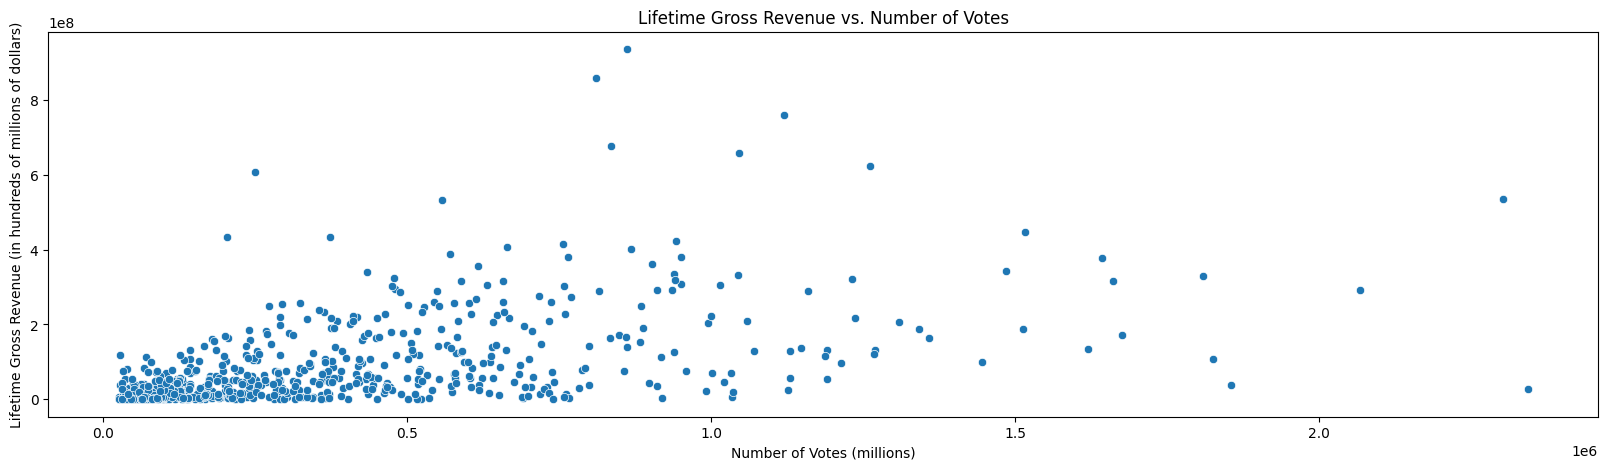

In [36]:
# Scatterplot correlation of # votes and gross
fig, ax = plt.subplots(figsize = (20, 5))
sns.scatterplot(x = movie["No_of_Votes"], y = movie["Gross"])
plt.title("Lifetime Gross Revenue vs. Number of Votes")
plt.xlabel("Number of Votes (millions)")
plt.ylabel("Lifetime Gross Revenue (in hundreds of millions of dollars)")
plt.show()

The scatterplot above suggests a weak, positive correlation between the number of votes and Lifetime Gross Revenue. As the number of votes increases, one can weakly infer a higher lifetime gross revenue. This could be due to the fact that a higher number of votes means greater interest in the movie, which means more ticket sales and more revenue.

We note that the majority of movies have fewer than 0.75 million votes, and the highest grossing movie had around 0.8 million votes.

####Taking the Logarithm to Normalize Gross Revenue Data

We see from the visualizations and statistics above that the Gross Revenue data is highly skewed. Since some of the models I will use expect normalized target data, I can make Gross Revenue more normal by taking the natural logarithm.

In [37]:
# Take the natural log
movie["ln_Gross"] = np.log(movie["Gross"])

Text(0.5, 1.0, 'Histogram of Natural Log of Lifetime Gross Revenue')

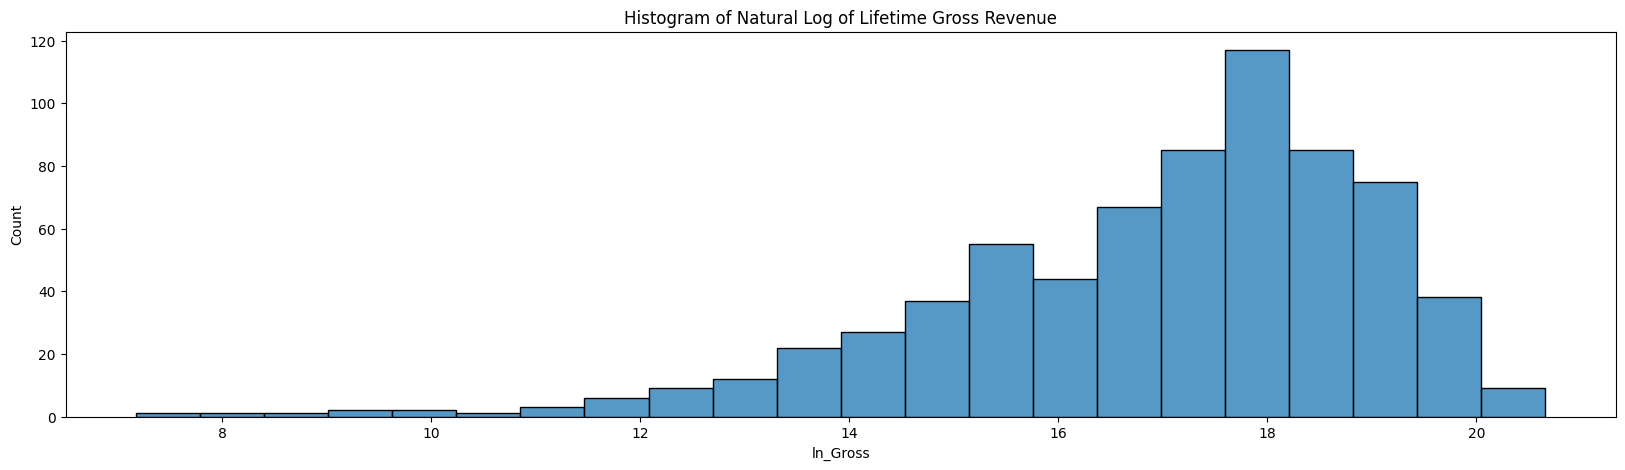

In [38]:
# Check for Normality
fig, ax = plt.subplots(figsize = (20, 5))
sns.histplot(data = movie, x = "ln_Gross")
plt.title("Histogram of Natural Log of Lifetime Gross Revenue")

While the data is still somewhat skewed, it is much more normally distributed.  **To ensure consistency across all models, I will use the log of Gross Revenue as the target variable from now on.**

#### A note on predictor variables



In some of the models below, I will use the IMDB Rating, Metascore, and total number of votes as predictor variables. While this is not ideal as these values manifest after a movie's release, I justify their use in the following ways:

1. **Timing of Metascore:** The metascore represents the ratings of professional movie raters from reputable sources such as newspapers, and they tend to form their opinions on the opening night. As such, the Metascore value will remain fairly fixed pretty soon after the movie's release, well before a movie reaches its Lifetime Gross Revenue.
2. **Timing of IMDB Ratings and Total Votes:** [Previous research](https://jbcoleto.blogspot.com/2020/06/cambio-notas-imdb-tiempo.html) shows that IMDB ratings tend not to fluctuate much after the first year, and the total number of votes for a given movie tends to follow a logistic pattern that approaches the upper asymptote after about 50 days. Therefore, as long as the model is used one year after the movie release (see point 4), the data is a good approximation for what would be available to other users of my models.
3. **Data Limitations:** IMDB does not easily provide information on how the ratings and votes for a movie change over time.
4. **Intent of Models:** In the introduction, I state that the goal of these models is to help investors, directors, and studios decide whether they should invest/commit to *sequals, further releases, and franchising opportunities*. These decisions are made after observing the initial performance of a movie (after a few months to a year post release).

As such, the models generated with these columns as predictors will still be useful for predicting Lifetime Gross Revenue since **my data approximates the values that would be available to people using the models for their intended purpose.**

## Models and Interpretation

To predict Lifetime Gross Revenue, I will generate four regression models to see which one performs the best. I will also separately create a fifth model involving a Neural Network to predict whether a movie will reach a certain Lifetime Gross Revenue given its overview (synopsis).

For each model, I will divide my existing data into training and testing datasets in an 80-20 train-test split, in line with industry-standard data analysis practices. This means that 80% of the data will be used to train the model, and 20% will be used to test the model.

In [39]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.pipeline import Pipeline
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV

####Baseline Model

I will evaluate the success of my various models by comparing their performance against a baseline model. I choose to compare the Mean Absolute Percentage Error (MAPE) because it's a fairly easy to understand metric that can be used across various models.

My baseline will be the mean of the natural log of the Lifetime Gross Revenues in my dataset, which I calculated previously.

In [40]:
#set up baseline model using Log of mean Gross Revenue, calculate baseline MAPE
mape = mean_absolute_percentage_error
y = movie['ln_Gross']
baseline_preds = np.ones(len(y))*y.mean()

mape(y, baseline_preds)
print(f"The baseline MAPE is {mape(y, baseline_preds)}")

The baseline MAPE is 0.10396012033076173


My calculations show that the baseline MAPE is 0.104.

#### Model 1: Multiple Linear Regression Model

My first model is a Multiple Linear Regression model. I choose to use this model because it is the most straightforward and easiest to understand. Using this model, we can identify the effects of individual predictors on Gross Revenue, as well as their combined effects.

######Model Creation

In [41]:
#create X & y, split into training and testing data
X = movie[['Released_Year', 'Certificate', 'Runtime', 'IMDB_Rating', "Meta_score", "No_of_Votes"]]
y = movie['ln_Gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, shuffle = True)

In [42]:
#encode categorical columns
cat_col = ['Certificate']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), verbose_feature_names_out = False, remainder = StandardScaler())

In [43]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', LinearRegression())])

#fit pipeline
pipe.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/compose/_column_transformer.py:1623: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('encode',
                 ColumnTransformer(remainder=StandardScaler(),
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['Certificate'])],
                                   verbose_feature_names_out=False)),
                ('model', LinearRegression())])

In [44]:
#find coefficients
lr = pipe.named_steps['model']
coefficients = lr.coef_
names = transformer.get_feature_names_out()
coefficient_vals = pd.DataFrame(coefficients, names).sort_values(by = 0, ascending = False)

In [45]:
# display all coefficients
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
coefficient_vals

,0
No_of_Votes,1.684543
Runtime,0.278400
Meta_score,0.217226
Released_Year,-0.071009
Certificate_PG-13,-0.529368
Certificate_PG,-0.965169
Certificate_R,-1.007764
IMDB_Rating,-1.106580


In [46]:
#find y-int
lr.intercept_
print(f"The y-intercept is {lr.intercept_}")

The y-intercept is 17.541467790523246


In [47]:
#determine feature importance
r = permutation_importance(pipe, X_test, y_test, n_repeats = 15)
print("The feature importance is as follows:")
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist()).sort_values(by = 0, ascending = False)

The feature importance is as follows:


,0
No_of_Votes,2.077449
IMDB_Rating,0.859913
Certificate,0.085211
Runtime,0.065540
Meta_score,0.026095
Released_Year,0.003529


In [48]:
#calculate MAPE for training data
y_train_preds = pipe.predict(X_train)
mape(y_train, y_train_preds)
print(f"The MAPE for the training data is {mape(y_train, y_train_preds)}")

The MAPE for the training data is 0.07494305063647635


In [49]:
#calculate MAPE for testing data
y_test_preds = pipe.predict(X_test)
mape(y_test, y_test_preds)
print(f"The MAPE for the testing data is {mape(y_test, y_test_preds)}")

The MAPE for the testing data is 0.06972479908372053


My Multiple Linear Regression model performed better than the baseline. Both the test and training data performed better than the baseline, as is evidenced by the fact that the test MAPE of 0.0697 and training MAPE of 0.0749 are both smaller than the baseline MAPE of 0.104. This is an indication that this model accounted for the impacts of Metacritic score, runtime, votes, released year, IMDB rating, and certificate on the log of lifetime gross revenue, which the baseline obviously could not.

Metacritic score, runtime, and number of votes all had a positive impact on the log of lifetime gross revenue. Based on the cofficients, the model suggests that as these values increase, the lifetime gross revenue increases too. Strangely, the released year and number of votes seems to negatively correlate with the log of Lifetime Gross Revenue. This seems counterintuitive because I would expect more votes to equal more attention and popularity, and also for more recent movies to benefit from a greater demand from entertainment in recent years.

The most important input was Number of Votes, followed by IMDB rating. The released year appears to be the least important input in this model.

#### Model 2: Quadratic Polynomial Model

We can build on the Linear Model above to incorporate quadratic coefficients. I choose to do this because a quadratic model may better capture any possible curved trends or more complex patterns in the data.

In [50]:
# import polynomial features, create the
from sklearn.preprocessing import PolynomialFeatures


In [51]:
# fit the model
poly_feats = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = poly_feats.fit_transform(transformer.fit_transform(X_train))
X_test_poly = poly_feats.transform(transformer.fit_transform(X_test))
lr2 = LinearRegression()
lr2.fit(X_train_poly, y_train)

LinearRegression()

In [52]:
#find number of coefficients
coefficients = lr2.coef_
names = poly_feats.get_feature_names_out()
coefficient_vals = pd.DataFrame(coefficients, names).sort_values(by = 0, ascending = False)
shape = coefficient_vals.shape
print(f"There are {shape[0]} coefficients in the model")

There are 44 coefficients in the model


In [53]:
# most important features
r = permutation_importance(lr2, X_test_poly, y_test, n_repeats=15)

# Get feature names from the original transformer and polynomial features
original_feature_names = transformer.get_feature_names_out()
poly_feature_names = poly_feats.get_feature_names_out(input_features=original_feature_names)

# Create DataFrame with correct feature names
importance_df = pd.DataFrame(r['importances_mean'], index=poly_feature_names).sort_values(by=0, ascending=False)

# Display the importance DataFrame
print("The feature importance is as follows:")
importance_df


The feature importance is as follows:


,0
Certificate_PG^2,2.729244e+23
Certificate_PG,2.729244e+23
No_of_Votes,2.677658e+00
No_of_Votes^2,6.720207e-01
IMDB_Rating,4.743934e-01
IMDB_Rating No_of_Votes,1.535650e-01
Released_Year Runtime,9.358355e-02
Runtime^2,4.736568e-02
Certificate_R Runtime,4.730596e-02
Released_Year Meta_score,2.895729e-02


In [54]:
# find training MAPE of the model
y_train_preds = lr2.predict(X_train_poly)
mape(y_train, y_train_preds)
print(f"The MAPE for the training data is {mape(y_train, y_train_preds)}")

The MAPE for the training data is 0.06536089199942088


In [55]:
# find testing MAPE of model
y_test_preds = lr2.predict(X_test_poly)
mape(y_test, y_test_preds)
print(f"The MAPE for the testing data is {mape(y_test, y_test_preds)}")

The MAPE for the testing data is 0.05844636246110065


The Quadratic model performed better than the baseline and the linear regression model for both the training and testing data. This is shown by the fact that the Quadratic model had a training MAPE of 0.065 and a testing MAPE of 0.058. This is better than the Linear model, which had a training MAPE of 0.0749 and a test MAPE of 0.0697. Of course, this is all better than the baseline MAPE of 0.104.

We see that the model has 44 features. The most important features are the Certificate_PG, followed by Number of Votes. Number of Votes remains influential, but clearly is not as impactful as in the linear model.

#### Model 3: Random Forest Model

Seeing as the non-linear Quadratic model performed better than the Linear one, I wanted to explore models that might further investigate non-linear relationships in the data. Since an ensemble model like Random Forests combines multiple decision trees, I hope to see if I can further improve my predictive abilities by finding the "best" model.

In [56]:
#create X & y, split into training and testing data
#we resplit the data since we no longer require normalization
X = movie[['Released_Year', 'Certificate', 'Runtime', 'IMDB_Rating', "Meta_score", "No_of_Votes"]]
y = movie['ln_Gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, shuffle = True)

In [57]:
#encode categorical columns
cat_col = ['Certificate']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), verbose_feature_names_out = False, remainder = StandardScaler())

In [58]:
#create pipeline for multiple regression model
pipe = Pipeline([('encode', transformer), ('model', RandomForestRegressor(random_state=0))])

In [59]:
#define grid of hyperparameters for number of estimators and max depth
param_grid = {'model__n_estimators': [10, 50, 100],'model__max_depth': [3, 5, 8]}

In [60]:
#perform grid-search w/ cross validation
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

#determine best parameters
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__max_depth': 8, 'model__n_estimators': 100}


In [61]:
# use max depth of 8 and 100 estimators in model
forest = grid_search.best_estimator_

In [62]:
# find feature importance
r = permutation_importance(forest, X_test, y_test, n_repeats=15)
print("The feature importance is as follows:")
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist()).sort_values(by = 0, ascending = False)


The feature importance is as follows:


,0
No_of_Votes,1.353544
Released_Year,0.210148
IMDB_Rating,0.147631
Certificate,0.074665
Runtime,0.056902
Meta_score,0.046463


In [63]:
# find MAPE for training data
y_train_preds = forest.predict(X_train)
mape(y_train, y_train_preds)
print(f"The MAPE for the training data is {mape(y_train, y_train_preds)}")

The MAPE for the training data is 0.035942091986670394


In [64]:
# find MAPE for testing data
y_test_preds = forest.predict(X_test)
mape(y_test, y_test_preds)
print(f"The MAPE for the testing data is {mape(y_test, y_test_preds)}")

The MAPE for the testing data is 0.060018968682073584


The Random Forest model determined that the best decision tree has a maximum depth of 8 and 100 estimators. The selected model performed better than the baseline, since it had a training MAPE of 0.035 and a testing MAPE of 0.06, significantly better than the baseline MAPE of 0.104. While the model  performed better in training compared to both the linear or quadratic models, the model did slightly worse than the quadratic model for the test data.

The most important features in this model were the Number of Votes, with Released Year coming in second. This is similar to the Linear model, where Number of Votes was the most important feature.

#### Model 4: K-Nearest Neighbors Model

To further investigate the normalized data and other possible non-linear patterns, I choose to build a KNN model. A KNN model makes predictions based on the surrounding figures. Therefore, if there are any clustering or local patterns that heavily influence Lifetime Gross Revenue, this model should identify them and make good predictions. By using a grid search, we can further identify how many neighbors (i.e. which "K" value) is optimal.


In [65]:
#create X & y, split into training and testing data
#we redo this to confirm that we are once again using the normalized data
X = movie[['Released_Year', 'Certificate', 'Runtime', 'IMDB_Rating', "Meta_score", "No_of_Votes"]]
y = movie['ln_Gross']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 20, shuffle = True)

In [66]:
#encode categorical column & scale data
cat_col = ['Certificate']
transformer = make_column_transformer((OneHotEncoder(drop = 'first', sparse_output = False), cat_col), remainder = StandardScaler())


In [67]:
#create pipeline for knn regression model
pipe = Pipeline([('encode', transformer), ('model', KNeighborsRegressor())])

#define grid of hyperparameters for number of neighbors
param_grid = {'model__n_neighbors': [5, 10, 15, 20, 25, 30]}

In [68]:
#perform grid-search w/ cross validation, scoring via MAPE
grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='neg_mean_absolute_percentage_error')
grid_search.fit(X_train, y_train)

#determine best parameter
grid_search.best_params_
print("Best parameters:", grid_search.best_params_)

Best parameters: {'model__n_neighbors': 5}


In [69]:
#model
knn_model = grid_search.best_estimator_

In [70]:
#determine feature importance
r = permutation_importance(knn_model, X_test, y_test, n_repeats = 15)
print("The feature importance is as follows:")
pd.DataFrame(r['importances_mean'], index = X_train.columns.tolist()).sort_values(by = 0, ascending = False)

The feature importance is as follows:


,0
No_of_Votes,0.931499
Released_Year,0.204127
IMDB_Rating,0.147830
Runtime,0.129212
Certificate,0.103346
Meta_score,0.058732


In [71]:
#calculate MAPE for training data
y_train_preds = knn_model.predict(X_train)
mape(y_train, y_train_preds)
print(f"The MAPE for the training data is {mape(y_train, y_train_preds)}")

The MAPE for the training data is 0.06294402985266428


In [72]:
# calculate MAPE for test data
y_test_preds = knn_model.predict(X_test)
mape(y_test, y_test_preds)
print(f"The MAPE for the testing data is {mape(y_test, y_test_preds)}")

The MAPE for the testing data is 0.06422136677865391


Out of the different K-values tested, the best model considers 5 of the nearest neighbors. This model performed better than the baseline for both training and testing data, since it has a training MAPE of 0.063 and a testing MAPE of 0.064. This is better than the baseline MAPE of 0.104.

The model performed better than the quadratic and linear models on the training data, as its MAPE of 0.063 is smaller than the Quadratic and Linear training MAPEs. However, while the model performed better than the linear model on the testing data, it failed to outperform the quadratic model. This suggests that there is not significant local clustering in the data. The model also failed to outperform the Random Forest model on both training and testing data.

The most significant feature was the Number of Votes, which is consistent with the Linear and Random Forest models.

#### Model 5: Neural Network for Binary Prediction

For my last model, I thought it would be interesting to see if it would be possible to use a neural network to do text classification. Some investors, upon receiving a synopsis during a movie pitch, may want to determine whether the movie is likely to reach a certain Lifetime Gross Revenue. This model seeks to determine whether a model is able to predict whether a movie will reach the average Lifetime Gross Revenue based on its synopsis.

We create a new dataframe with a binary classification column, depending on whether the Lifetime Gross Revenue is higher or lower than the average. Like the previous models, I will divide my data into training and testing datasets in an 80-20 train-test split, in line with industry-standard data analysis practices. We will need to create a new baseline and evaluation metric.

In [73]:
# create new dataframe
synopsis = movie[["Overview", "ln_Gross"]]
average = movie["ln_Gross"].mean()
synopsis["Above_Average"] = [1 if x > average else 0 for x in synopsis["ln_Gross"]]

<ipython-input-73-56a20d0ebc0b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  synopsis["Above_Average"] = [1 if x > average else 0 for x in synopsis["ln_Gross"]]


In [74]:
#import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [75]:
#create a tokenizer
tokenizer = Tokenizer(num_words = 1000)

#fit the tokenizer
tokenizer.fit_on_texts(synopsis['Overview'].values)

#create document term matrix (binarized)
dtm = tokenizer.texts_to_matrix(synopsis['Overview'].values)

#Define our class and methods for the training and testing data classes
class TextDataset(Dataset):
  def __init__(self, X, y):
    super().__init__()
    self.x = torch.tensor(X, dtype = torch.float)
    self.y = torch.tensor(y.values, dtype = torch.float)

  def __len__(self):
    return len(self.y)

  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [76]:
# Produce our train and test splits, test size 0.2
X = dtm
y = synopsis['Above_Average']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [77]:
#create data class
train_dataset = TextDataset(X_train, y_train)
test_dataset = TextDataset(X_test, y_test)

In [78]:
#dataset and loader
trainloader = DataLoader(train_dataset, batch_size = 32)
#dataset and loader
testloader = DataLoader(test_dataset, batch_size = 32)

In [79]:
#loss and optimizer
class TextModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.lin1 = nn.Linear(in_features = 1000, out_features = 1000)
    self.lin2 = nn.Linear(1000, 100)
    self.lin3 = nn.Linear(100, 1)
    self.sigmoid = nn.Sigmoid()
    self.act = nn.ReLU()

  def forward(self, x):
    x = self.act(self.lin1(x))
    x = self.act(self.lin2(x))
    return self.sigmoid(self.lin3(x))

In [80]:
#Create model
model = TextModel()
Xt = torch.tensor(X_test, dtype = torch.float)
output = model(Xt) #model predictions

#Converting probabilities to prediction
preds = np.where(np.array(output.detach()) >= .5, 1, 0)

######Baseline and Evaluation Metric

We use Accuracy as our evaluation metric, which is defined as (True Positives + True Negatives) / Total. We choose this because because both true positives and true negatives matter: investors cannot afford to invest in unprofitable movies, but they also cannot afford to miss out on good ideas.

We calculate the baseline accuracy with the assumption that all movies fail to achieve the mean Lifetime Gross Revenue.

In [81]:
test_results = np.unique(y_test, return_counts = True)
results = test_results[1][0]/(test_results[1][0] + test_results[1][1])
print(f"The baseline accuracy is {results}")

The baseline accuracy is 0.4857142857142857


######Model Accuracy - Test Data

We calculate the baseline accuracy using the Test Data and the Prediction output.

In [82]:
# Assess accuracy of model
accuracy = sum(preds[:, 0] == y_test)/len(y_test)
print(f"The model's accuracy is {accuracy}")

The model's accuracy is 0.5


As we observe, the model is a bit more accurate than the baseline, indicating that it may be moderately useful in assessing whether a movie's log of Gross Revenue will be higher than the average.


## Summary of Findings

My analysis consisted of five models: a Linear model, Quadratic model, Random Forest model, KNN model, and a Neural Network for binary predictions. All models performed better than the baseline, highlighting their usefulness in potentially helping investors and analysts project Lifetime Gross Revenue. In addition to directly predicting the lifetime revenue of the movie in question, this information may also be used to investigate the feasibility and profitability of reruns, sequals, and other related revenue streams.

The following are a few key findings and takeaways:
1. The four regression models listed from best to worst performance are as follows: Quadratic, Random Forest, KNN, and Linear.
2. The Quadratic model is quite robust, performing  better than the other models and significantly better than the baseline with a testing MAPE of 0.058. This could be due to the Quadratic model's ability to account for non-linear trends and account for interaction effects by adding many additional terms. This highlights its effectiveness and usefulness for making predictions about Lifetime Gross Revenue.
3. The number of votes was the most impactful feature the Linear, Random Forest, and KNN models, and a close second place for the Quadratic model. This could be due to a higher number of votes implying a higher movie popularity, which implies higher interest and viewership and thus higher revenues.
4. The Neural Network performed better than the baseline, implying that it is useful for predicting if a movie will make more than the average log Gross Revenue. This is likely due to successful movies in the dataset having similar themes (adventure, drama, etc), meaning the model could identify keywords that could distinguish between the above and below average groups.
5. The Neural Network did not perform significantly better than the baseline however, implying that a short synopsis of a movie is not a very robust predictor of the movie's moneymaking potential.

Overall, the Quadratic model is likely the best model to use for predicting log Lifetime Gross Revenue. The number of votes remains an influential factor regardless of model, likely due to it acting as an indicator for overall movie interest and popularity. These takeaways offer a detailed view into the many factors that affect a movie's potential ability to make money, highlighting the complex and highly difficult task that studios, investors, directors, and other stakeholders face when deciding on the next big film.

## Discussion and Possible Next Steps

To strengthen the predictions and usefulness of these models, I believe that future researchers and analysts could implement the following:

1. Adjust data for inflation: I think one major drawback and a major cause of skewness in my data was the lack of real values for Gross Revenue. With inflation-adjusted data, I believe my model would likely be more normal and thus require less adjusting, resulting in easier comparisons and a better model overall.

2. Add in information about production costs: my data did not include the costs of production. I believe that if I had this data, I could have used Revenue per Dollar invested as my target instead of Gross Revenue. This metric is more appropriate for investors and studios who are looking to decide how much to invest, and could also avoid some of the concerns regarding inflation since taking the ratio would allow us to cancel out the inflation factor.

3. Add in time-series information: I would be really interested in seeing how the model projections change as the input values, such as total votes and rating, change over time. Again, this would be very valuable to investors who have to make a decision quickly, but want to see a range of projected revenues given the currently available data and possible future trends.

4. Add in economic data: Movies are luxury goods, and one of the things that people cut out when money gets tight are subscription services and movie dates. As such, when the movie is released relative to the business/economic cycle can greatly affect its initial popularity, which has lasting consequences for its future legacy.

5. Break down results and data by country: depending on where a movie was produced or initially released, movies may have very different revenue generation patterns. By having the capability to add in country data, investors might be able to get more accurate predictions on how a movie might perform, as well as the best place to initially release a particular movie.

Integrating these factors would allow me to further hone my analysis and provide even more robust predictions and results, making my models even more valuable to investors, producers, analysts, and movie affictionados around the world.